C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


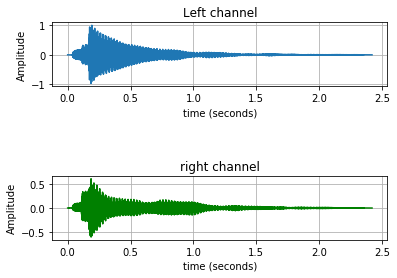

In [65]:
# -*- coding: utf-8 -*-
# 讀Wave檔案並且繪製波形
import wave
import matplotlib.pyplot as plt
import numpy as np

# 開啟WAV音訊
f = wave.open(r"C:\Windows\media\Windows Background.wav", "rb")

# 讀取格式資訊
# (聲道數、量化位數、取樣頻率、取樣點數、壓縮型別、壓縮型別的描述)
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
# nchannels通道數 = 2
# sampwidth量化位數 = 2
# framerate取樣頻率 = 22050
# nframes取樣點數 = 53395

# 讀取nframes個數據，返回字串格式
str_data = f.readframes(nframes)

f.close()

#將字串轉換為陣列，得到一維的short型別的陣列
wave_data = np.fromstring(str_data, dtype=np.short)

# 賦值的歸一化
wave_data = wave_data*1.0/(max(abs(wave_data)))

# 整合左聲道和右聲道的資料
wave_data = np.reshape(wave_data,[nframes,nchannels])
# wave_data.shape = (-1, 2)   # -1的意思就是沒有指定,根據另一個維度的數量進行分割

# 最後通過取樣點數和取樣頻率計算出每個取樣的時間
time = np.arange(0, nframes) * (1.0 / framerate)

plt.figure()
# 左聲道波形
plt.subplot(3,1,1)
plt.plot(time, wave_data[:,0])
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.title("Left channel")
plt.grid()

plt.subplot(3,1,3)
# 右聲道波形
plt.plot(time, wave_data[:,1], c="g")
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.title("Left channel")
plt.title("right channel")
plt.grid()

plt.show()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


IndexError: index 1 is out of bounds for axis 1 with size 1

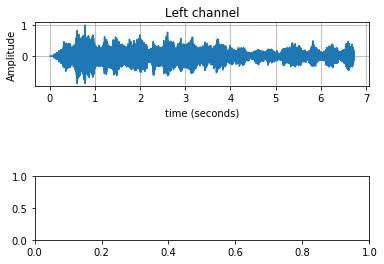

In [63]:
# -*- coding: utf-8 -*-
# 讀Wave檔案並且繪製波形
import wave
import matplotlib.pyplot as plt
import numpy as np

# 開啟WAV音訊
f = wave.open(r"test1.wav", "rb")

# 讀取格式資訊
# (聲道數、量化位數、取樣頻率、取樣點數、壓縮型別、壓縮型別的描述)
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
# nchannels通道數 = 2
# sampwidth量化位數 = 2
# framerate取樣頻率 = 22050
# nframes取樣點數 = 53395

# 讀取nframes個數據，返回字串格式
str_data = f.readframes(nframes)

f.close()

#將字串轉換為陣列，得到一維的short型別的陣列
wave_data = np.fromstring(str_data, dtype=np.short)

# 賦值的歸一化
wave_data = wave_data*1.0/(max(abs(wave_data)))

# 整合左聲道和右聲道的資料
wave_data = np.reshape(wave_data,[nframes,nchannels])
# wave_data.shape = (-1, 2)   # -1的意思就是沒有指定,根據另一個維度的數量進行分割

# 最後通過取樣點數和取樣頻率計算出每個取樣的時間
time = np.arange(0, nframes) * (1.0 / framerate)

plt.figure()
# 左聲道波形
plt.subplot(3,1,1)
plt.plot(time, wave_data[:,0])
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.title("Left channel")
plt.grid()

plt.subplot(3,1,3)
# 右聲道波形
plt.plot(time, wave_data[:,1], c="g")
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
plt.title("Left channel")
plt.title("right channel")
plt.grid()

plt.show()

[[ 0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j]
 ...
 [-0.00040492+0.j  0.00040492+0.j]
 [-0.00048591+0.j  0.00048591+0.j]
 [-0.00048591+0.j  0.00048591+0.j]]
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.00040492 0.00040492]
 [0.00048591 0.00048591]
 [0.00048591 0.00048591]]


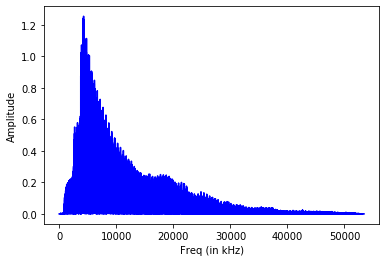

In [3]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

sampling_freq, audio = wavfile.read(r"C:\Windows\media\Windows Background.wav")   # 讀取檔案

audio = audio / np.max(audio)   # 歸一化，標準化

# 應用傅立葉變換
fft_signal = np.fft.fft(audio)
print(fft_signal)
# [-0.04022912+0.j         -0.04068997-0.00052721j -0.03933007-0.00448355j
#  ... -0.03947908+0.00298096j -0.03933007+0.00448355j -0.04068997+0.00052721j]

fft_signal = abs(fft_signal)
print(fft_signal)
# [0.04022912 0.04069339 0.0395848  ... 0.08001755 0.09203427 0.12889393]

# 建立時間軸
Freq = np.arange(0, len(fft_signal))

# 繪製語音訊號頻譜圖
plt.figure()
plt.plot(Freq, fft_signal, color='blue')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Amplitude')
plt.show()

In [86]:
import json
import numpy as np
from scipy.io.wavfile import write

# json檔案中包含一些音階以及他們的頻率
tone_map_file = 'tone_freq_map.json'

# 讀取頻率對映檔案
with open(tone_map_file, 'r') as f:
    tone_freq_map = json.loads(f.read())
    print(tone_freq_map)

# 設定生成G調的輸入引數
tone = 'A3'
duration = 2             # seconds
amplitude = 10000        # 振幅
sampling_freq = 44100    # Hz
music = np.empty(shape=1)#一維空陣列
# 生成音階
times = np.linspace(0, duration,(int)(duration * sampling_freq))
sound = np.sin(2 * np.pi * tone_freq_map[tone] * times)
music = np.append(music, sound)
music *= amplitude
music = music.astype(np.int16)

# 寫入輸出檔案
write('music.wav', sampling_freq, music)

{'C0': 16.35, 'C#0': 17.32, 'D0': 18.35, 'D#0': 19.45, 'E0': 20.6, 'F0': 21.83, 'F#0': 23.12, 'G0': 24.5, 'G#0': 25.96, 'A0': 27.5, 'A#0': 29.14, 'B0': 30.87, 'C1': 32.7, 'C#1': 34.65, 'D1': 36.71, 'D#1': 38.89, 'E1': 41.2, 'F1': 43.65, 'F#1': 46.25, 'G1': 49.0, 'G#1': 51.91, 'A1': 55.0, 'A#1': 58.27, 'B1': 61.74, 'C2': 65.41, 'C#2': 69.3, 'D2': 73.42, 'D#2': 77.78, 'E2': 82.41, 'F2': 87.31, 'F#2': 92.5, 'G2': 98.0, 'G#2': 103.83, 'A2': 110.0, 'A#2': 116.54, 'B2': 123.47, 'C3': 130.81, 'C#3': 138.59, 'D3': 146.83, 'D#3': 155.56, 'E3': 164.81, 'F3': 174.61, 'F#3': 185.0, 'G3': 196.0, 'G#3': 207.65, 'A3': 220.0, 'A#3': 233.08, 'B3': 246.94, 'C4': 261.63, 'C#4': 277.18, 'D4': 293.66, 'D#4': 311.13, 'E4': 329.63, 'F4': 349.23, 'F#4': 369.99, 'G4': 392.0, 'G#4': 415.3, 'A4': 440.0, 'A#4': 466.16, 'B4': 493.88, 'C5': 523.25, 'C#5': 554.37, 'D5': 587.33, 'D#5': 622.25, 'E5': 659.25, 'F5': 698.46, 'F#5': 739.99, 'G5': 783.99, 'G#5': 830.61, 'A5': 880.0, 'A#5': 932.33, 'B5': 987.77, 'C6': 1046.

In [87]:
import json
import numpy as np
from scipy.io.wavfile import write
with open('tone_freq_map.json', 'r') as f:
    freqs = json.loads(f.read())

# 音階及其連續時間
tones = [('D5', 0.3),('G5', 0.6), ('C5', 0.5), ('A4', 0.3), ('A#4', 0.7)]
sample_rate = 44100
amplitude = 10000
music = np.empty(shape=1)
for tone, duration in tones:
    times = np.linspace(0, duration,(int)(duration * sample_rate))
    sound = np.sin(2 * np.pi * freqs[tone] * times)
    music = np.append(music, sound)
music *= amplitude
music = music.astype(np.int16)
write('music1.wav', sample_rate, music)

In [88]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py 

In [89]:
from thinkdsp import read_wave

wave = read_wave('music.wav')
wave.normalize()
wave.make_audio()

In [85]:
wave1 = read_wave('music1.wav')
wave1.normalize()
wave1.make_audio()